# <center>Time Series Analysis on Pune precipitation data from 1965 to 2002.</center>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import itertools
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap_external.py:415: ImportWarning: Not importing directory /home/abhishek/.local/lib/python3.5/site-packages/google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/usr/lib/python3.5/importlib/_bootstrap_external.py:415: ImportWarning: Not importing directory /home/abhishek/.local/lib/python3.5/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/abhishek/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py:936: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/home/abhishek/.local/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/home/abhishek/.local/lib/python3.5/site-packages/tensorflow/python/ke

In [2]:
filename = 'pune_1965_to_2002.csv'

rainfall_data_matrix = pd.read_csv(filename, delimiter='\t')
rainfall_data_matrix.set_index('Year', inplace=True)
rainfall_data_matrix = rainfall_data_matrix.transpose()
rainfall_data_matrix

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,0.029,0.905,0.248,0.318,0.248,0.070,0.000,0.000,0.000,0.000,...,0.000,0.879,0.695,0.016,1.284,0.008,0.000,0.000,0.147,0.231
Feb,0.069,0.000,3.390,3.035,2.524,0.000,0.000,0.029,2.969,0.000,...,0.078,0.325,0.000,2.779,0.000,2.671,1.431,0.170,0.000,0.911
Mar,0.000,0.000,1.320,1.704,0.334,0.001,0.000,0.000,0.234,6.427,...,1.211,2.415,1.770,0.087,0.747,0.073,0.000,0.000,2.178,0.388
Apr,21.667,2.981,13.482,23.307,4.569,16.218,0.812,5.982,3.925,16.864,...,2.062,16.823,25.949,6.318,23.912,0.377,0.642,1.193,1.528,53.266
May,17.859,63.008,11.116,7.441,6.213,68.036,57.691,19.101,14.978,51.209,...,3.248,33.378,23.964,5.134,4.664,15.717,35.828,26.237,7.860,18.430
Jun,102.111,94.088,251.314,179.872,393.682,300.546,297.187,132.413,304.484,148.697,...,234.068,749.030,163.515,453.607,673.831,238.609,415.471,371.328,247.982,509.145
Jul,606.071,481.942,780.006,379.354,678.354,330.502,122.195,338.484,696.024,405.359,...,450.088,707.986,501.461,558.586,422.913,590.663,277.137,265.417,279.547,84.936
Aug,402.521,59.386,181.069,171.979,397.335,283.476,372.693,68.741,256.932,319.651,...,150.278,230.898,114.206,212.489,541.579,362.357,98.616,220.814,189.404,257.205
Sep,69.511,150.624,183.757,219.884,205.413,158.640,286.056,120.415,183.206,288.533,...,101.928,115.509,288.262,203.642,60.477,243.444,225.962,147.196,158.025,78.269
Oct,5.249,1.308,50.404,73.997,24.014,115.758,39.424,1.078,101.805,188.876,...,225.904,116.348,84.359,176.471,31.050,96.324,180.300,38.246,135.518,21.486


In [3]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(rainfall_data_matrix.columns)*12)
dates

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

Text(0.5,1,'Month vs Precipitation across all years')

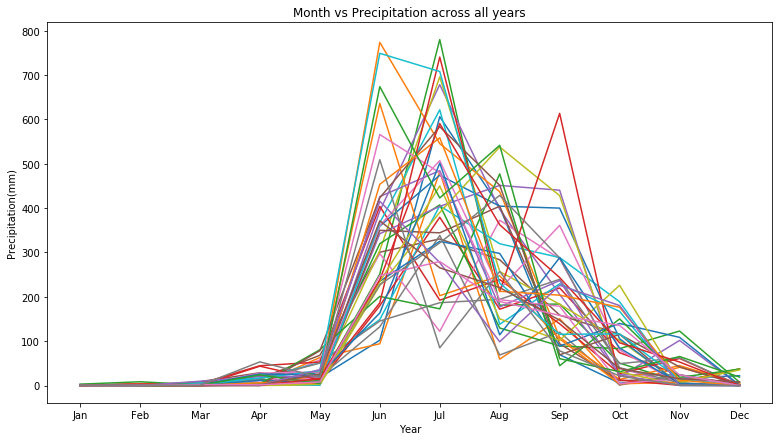

In [4]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

Text(0.5,1,'Month vs Precipitation across all years')

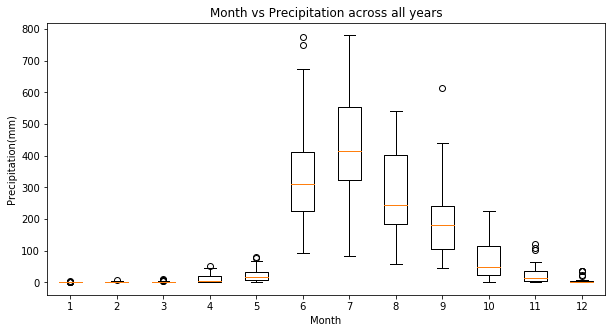

In [5]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

In [6]:
rainfall_data_matrix_np = rainfall_data_matrix.transpose().as_matrix()

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

In [7]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

test_rainfall_data = rainfall_data.ix['1995': '2002']
rainfall_data = rainfall_data.ix[: '1994']
rainfall_data = rainfall_data.round(5)
rainfall_data.head()

,Precipitation
1965-01-01,0.029
1965-02-01,0.069
1965-03-01,0.000
1965-04-01,21.667
1965-05-01,17.859


In [8]:
rainfall_data.shape

(360, 1)

In [9]:
test_rainfall_data.shape

(96, 1)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(rainfall_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

## <center> Artificial Neural Networks </center>

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [12]:
def calculate_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    return mse, mae, mape, rmse

In [13]:
def plot_keras_model(model, show_shapes=True, show_layer_names=True):
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names).create(prog='dot',format='svg'))

In [14]:
def get_combinations(parameters):
    return list(itertools.product(*parameters))

In [15]:
def create_NN(input_nodes, hidden_nodes, output_nodes):
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim=input_nodes))
    model.add(Dense(output_nodes))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
def train_model(model, X_train, y_train, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=True)
    return model

In [17]:
def reshape_arrays(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.reshape(y_train, (len(y_train), 1))
    return X_train, y_train

In [18]:
def preprocess_FNN(data, look_back):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(data.shape[0]-look_back):
        x = data[i:look_back+i][::-1]
        y = data[look_back+i]
        X_train.append(list(x))
        y_train.append(y)
    input_seq_for_test = data[i+1:look_back+i+1][::-1]
    return X_train, y_train, input_seq_for_test

In [19]:
def forecast_FNN(model, input_sequence, future_steps):
    forecasted_values = []
    for i in range(future_steps):
        forecasted_value = model.predict(input_sequence)
        forecasted_values.append(forecasted_value[0][0])
        input_sequence[0] = np.append(forecasted_value, input_sequence[0][:-1])
    return forecasted_values

In [20]:
def FNN(data, look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler):
    data = scaler.transform(data)
    X_train, y_train, input_seq_for_test_FNN = preprocess_FNN(data, look_back)
    X_train, y_train = reshape_arrays(X_train, y_train)

    model_FNN = create_NN(input_nodes=look_back, hidden_nodes=hidden_nodes, output_nodes=output_nodes)
    model_FNN = train_model(model_FNN, X_train, y_train, epochs, batch_size)

    input_seq_for_test_FNN = np.reshape(input_seq_for_test_FNN, (1, len(input_seq_for_test_FNN)))
    forecasted_values_FNN = forecast_FNN(model_FNN, input_sequence=input_seq_for_test_FNN, future_steps=future_steps)
    
    forecasted_values_FNN = list(scaler.inverse_transform([forecasted_values_FNN])[0])
    
    return model_FNN, forecasted_values_FNN

In [21]:
def get_accuracies_FNN(rainfall_data, test_rainfall_data, parameters, scaler):
    combination_of_params = get_combinations(parameters)
    information_FNN = []
    iterator = 0
    print('Number of combinations: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        look_back = param[0]
        hidden_nodes = param[1]
        output_nodes = param[2]
        epochs = param[3]
        batch_size = param[4]
        future_steps = param[5]

        model_FNN, forecasted_values_FNN = FNN(rainfall_data, look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler)
        
        y_true = test_rainfall_data.ix[:future_steps].Precipitation
        mse, mae, mape, rmse = calculate_performance(y_true, forecasted_values_FNN)
        
        info = list(param) + [mse, mae, rmse] + forecasted_values_FNN
        information_FNN.append(info)

    information_FNN_df = pd.DataFrame(information_FNN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_FNN_df.columns = ['look_back', 'hidden_nodes', 'output_nodes', 'epochs', 'batch_size', 'future_steps', 'MSE', 'MAE', 'RMSE'] + indexes
    return information_FNN_df

In [22]:
def preprocess_TLNN(data, time_lagged_points):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(max(time_lagged_points), data.shape[0]):
        x = [data[i-p] for p in time_lagged_points]
        y = data[i]
        X_train.append(list(x))
        y_train.append(y)
    input_seq_for_test = [data[i+1-p] for p in time_lagged_points]
    return X_train, y_train, input_seq_for_test

In [23]:
def forecast_TLNN(model, time_lagged_points, last_sequence, future_steps):
    forecasted_values = []
    max_lag = max(time_lagged_points)
    for i in range(future_steps):
        input_sequence = [last_sequence[max_lag - p] for p in time_lagged_points]
        forecasted_value = model.predict(np.reshape(input_sequence, (1, len(input_sequence))))
        forecasted_values.append(forecasted_value[0][0])
        last_sequence = last_sequence[1:] + [forecasted_value[0][0]]
    return forecasted_values

In [24]:
def TLNN(data, time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler):
    data = scaler.transform(data)
    X_train, y_train, input_seq_for_test_TLNN = preprocess_TLNN(data, time_lagged_points)
    X_train, y_train = reshape_arrays(X_train, y_train)
    model_TLNN = create_NN(input_nodes=len(time_lagged_points), hidden_nodes=hidden_nodes, output_nodes=output_nodes)
    model_TLNN = train_model(model_TLNN, X_train, y_train, epochs, batch_size)

    max_lag = max(time_lagged_points)
    forecasted_values_TLNN = forecast_TLNN(model_TLNN, time_lagged_points, 
                                      list(data[-max_lag:]), future_steps=future_steps)
    forecasted_values_TLNN = list(scaler.inverse_transform([forecasted_values_TLNN])[0])
    
    return model_TLNN, forecasted_values_TLNN

In [25]:
def get_accuracies_TLNN(rainfall_data, test_rainfall_data, parameters, scaler):
    combination_of_params = get_combinations(parameters)
    information_TLNN = []
    iterator = 0
    print('Number of combinations: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        time_lagged_points = param[0]
        hidden_nodes = param[1]
        output_nodes = param[2]
        epochs = param[3]
        batch_size = param[4]
        future_steps = param[5]

        model_TLNN, forecasted_values_TLNN = TLNN(rainfall_data, time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler)
        
        y_true = test_rainfall_data.ix[:future_steps].Precipitation
        mse, mae, mape, rmse = calculate_performance(y_true, forecasted_values_TLNN)
        
        info = list(param) + [mse, mae, rmse] + forecasted_values_TLNN
        information_TLNN.append(info)

    information_TLNN_df = pd.DataFrame(information_TLNN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_TLNN_df.columns = ['look_back_lags', 'hidden_nodes', 'output_nodes', 'epochs', 'batch_size', 'future_steps', 'MSE', 'MAE', 'RMSE'] + indexes
    return information_TLNN_df

In [26]:
def preprocess_SANN(data, seasonal_period):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(seasonal_period, data.shape[0]-seasonal_period+1):
        x = data[i-seasonal_period:i][::-1]
        y = data[i:i+seasonal_period]
        X_train.append(list(x))
        y_train.append(list(y))
    input_seq_for_test = data[i+1-seasonal_period:i+1][::-1]
    return X_train, y_train, input_seq_for_test

In [27]:
def forecast_SANN(model, input_sequence, seasonal_period, future_steps):
    iterations = future_steps/seasonal_period
    forecasted_values = []
    for i in range(int(iterations) + 1):
        next_forecasted_values = model.predict(input_sequence)
        forecasted_values += list(next_forecasted_values[0])
        input_sequence = next_forecasted_values
    return forecasted_values[:future_steps]

In [28]:
def SANN(data, seasonal_period, hidden_nodes, epochs, batch_size, future_steps, scaler):
    data = scaler.transform(data)
    X_train, y_train, input_seq_for_test_SANN = preprocess_SANN(data, seasonal_period)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    input_seq_for_test_SANN = np.reshape(input_seq_for_test_SANN, (1, len(input_seq_for_test_SANN)))
    model_SANN = create_NN(input_nodes=seasonal_period, hidden_nodes=hidden_nodes, output_nodes=seasonal_period)
    model_SANN = train_model(model_SANN, X_train, y_train, epochs, batch_size)
    
    forecasted_values_SANN = forecast_SANN(model_SANN, input_seq_for_test_SANN, seasonal_period, future_steps=future_steps)
    forecasted_values_SANN = list(scaler.inverse_transform([forecasted_values_SANN])[0])
    return model_SANN, forecasted_values_SANN

In [29]:
def get_accuracies_SANN(rainfall_data, test_rainfall_data, parameters, scaler):
    combination_of_params = get_combinations(parameters)
    information_SANN = []
    iterator = 0
    print('Number of combinations: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        seasonal_period = param[0]
        hidden_nodes = param[1]
        epochs = param[2]
        batch_size = param[3]
        future_steps = param[4]

        model_SANN, forecasted_values_SANN = SANN(rainfall_data, seasonal_period, hidden_nodes, epochs, batch_size, future_steps, scaler)
        
        y_true = test_rainfall_data.ix[:future_steps].Precipitation
        mse, mae, mape, rmse = calculate_performance(y_true, forecasted_values_SANN)
        
        info = list(param) + [mse, mae, rmse] + forecasted_values_SANN
        information_SANN.append(info)

    information_SANN_df = pd.DataFrame(information_SANN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_SANN_df.columns = ['seasonal_period', 'hidden_nodes', 'epochs', 'batch_size', 'future_steps', 'MSE', 'MAE', 'RMSE'] + indexes
    return information_SANN_df

In [58]:
def analyze_results(data_frame, test_rainfall_data, name):
    optimized_params = data_frame.iloc[data_frame.RMSE.argmin]
    future_steps = optimized_params.future_steps
    forecast_values = optimized_params[-1*int(future_steps):]
    y_true = test_rainfall_data.ix[:int(future_steps)]
    forecast_values.index = y_true.index
    
    print('Best parameters: ')
    if (name == 'FNN'):
        print('Input nodes(p): ' + str(optimized_params.look_back))
        print('Hidden nodes: ' + str(optimized_params.hidden_nodes))
        print('Output nodes: ' + str(optimized_params.output_nodes))
    elif (name == 'TLNN'):
        s = ''
        for i in optimized_params.look_back_lags:
            s = s+' '+str(i)
        print('Look back lags: ' + s)
        print('Hidden nodes: ' + str(optimized_params.hidden_nodes))
        print('Output nodes: ' + str(optimized_params.output_nodes))
    else:
        print('Input nodes(s): ' + str(optimized_params.seasonal_period))
        print('Hidden nodes: ' + str(optimized_params.hidden_nodes))
        print('Output nodes: ' + str(optimized_params.seasonal_period))
        
    print('Number of epochs: ' + str(optimized_params.epochs))
    print('Batch size: ' + str(optimized_params.batch_size))
    print('Number of future steps forecasted: ' + str(optimized_params.future_steps))
    print('Mean Squared Error(MSE): ' + str(optimized_params.MSE))
    print('Mean Absolute Error(MAE): ' + str(optimized_params.MAE))
    print('Root Mean Squared Error(RMSE): ' + str(optimized_params.RMSE))
    
    
    plt.figure(figsize=(10,5))
    plt.plot(y_true, color='green', label='Actual values')
    plt.plot(forecast_values, color='red', label='Forecasted values')
    plt.title(name + ' - Comaprison: Actual vs Forecasted')
    plt.xlabel('Year')
    plt.ylabel('Monthly mean Precipitation')
    plt.legend(loc='best')
    
    return optimized_params

Number of combinations: 1
1
Best parameters: 
Input nodes(p): 12.0
Hidden nodes: 4.0
Output nodes: 1.0
Number of epochs: 50.0
Batch size: 10.0
Number of future steps forecasted: 60.0
Mean Squared Error(MSE): 15307.065316091639
Mean Absolute Error(MAE): 90.37042059328905
Root Mean Squared Error(RMSE): 123.72172531973372


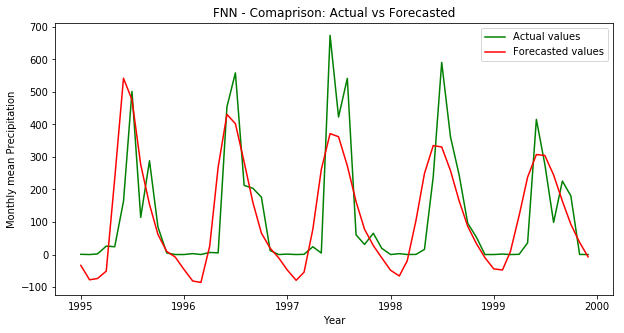

In [60]:
# look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps

parameters = [[12], [4], [1], [50], [10], [60]]
information_FNN_df = get_accuracies_FNN(rainfall_data, test_rainfall_data, parameters, scaler)
optimized_params_FNN = analyze_results(information_FNN_df, test_rainfall_data, 'FNN')

Number of combinations: 1
1
Best parameters: 
Look back lags:  1 2 3 4 5 6 7 8 9 10 11 12
Hidden nodes: 4
Output nodes: 1
Number of epochs: 50
Batch size: 5
Number of future steps forecasted: 60
Mean Squared Error(MSE): 14349.436238298082
Mean Absolute Error(MAE): 88.36961464650071
Root Mean Squared Error(RMSE): 119.78913238811809


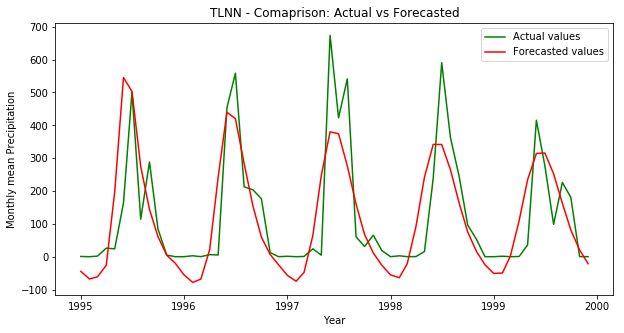

In [62]:
# time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps

parameters = [[[1,2,3,4,5,6,7,8,9,10,11,12]], [4], [1], [50], [5], [60]]
information_TLNN_df = get_accuracies_TLNN(rainfall_data, test_rainfall_data, parameters, scaler)
optimized_params_TLNN = analyze_results(information_TLNN_df, test_rainfall_data, 'TLNN')

Number of combinations: 1
1
Best parameters: 
Input nodes(s): 12.0
Hidden nodes: 15.0
Output nodes: 12.0
Number of epochs: 200.0
Batch size: 10.0
Number of future steps forecasted: 96.0
Mean Squared Error(MSE): 16663.732509829602
Mean Absolute Error(MAE): 95.6102965975228
Root Mean Squared Error(RMSE): 129.08808043281766


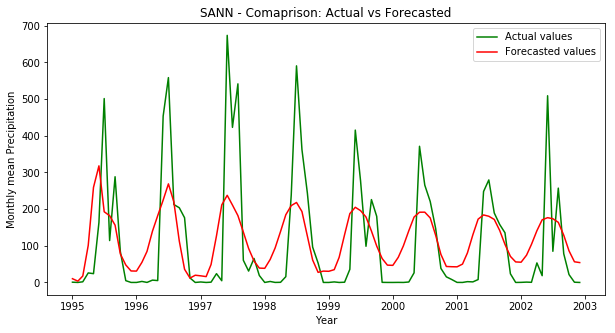

In [63]:
# seasonal_period, hidden_nodes, epochs, batch_size, future_steps

parameters = [[12], [15], [200], [10], [96]]
information_SANN_df = get_accuracies_SANN(rainfall_data, test_rainfall_data, parameters, scaler)
optimized_params_SANN = analyze_results(information_SANN_df, test_rainfall_data, 'SANN')

Overall Best method on this data is TLNN
Best parameters: 
Look back lags:  1 2 3 4 5 6 7 8 9 10 11 12
Hidden nodes: 4
Output nodes: 1
Number of epochs: 50
Batch size: 5
Number of future steps forecasted: 60
Mean Squared Error(MSE): 14349.436238298082
Mean Absolute Error(MAE): 88.36961464650071
Root Mean Squared Error(RMSE): 119.78913238811809


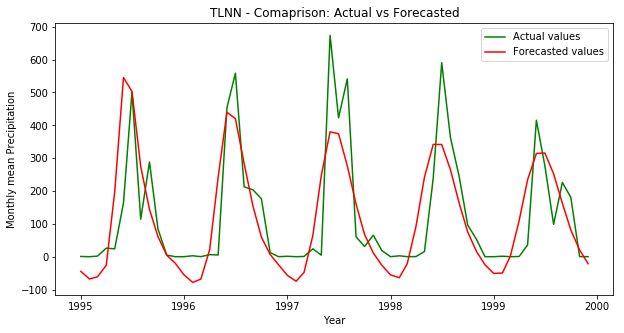

In [79]:
def best_of_all(list_of_methods):
    RMSE_values = [x.RMSE for x in list_of_methods]
    index = np.argmin(RMSE_values)
    if (index==0):
        name = 'FNN'
    elif (index == 1):
        name = 'TLNN'
    else:
        name = 'SANN'
    print('Overall Best method on this data is ' + name)
    return index, name
    
list_of_methods = [optimized_params_FNN, optimized_params_TLNN, optimized_params_SANN]
information = [information_FNN_df, information_TLNN_df, information_SANN_df]
index, name = best_of_all(list_of_methods)
best_optimized_params = analyze_results(information[index], test_rainfall_data, name)

In [37]:
information_SANN_df

,seasonal_period,hidden_nodes,epochs,batch_size,future_steps,MSE,MAE,RMSE,1,2,...,87,88,89,90,91,92,93,94,95,96
0,12,15,200,10,96,16013.130197,93.276986,126.542997,9.300517,12.289888,...,111.198787,141.48765,177.318066,187.736407,193.181246,169.603198,136.265345,88.255169,46.814955,45.605736


In [38]:
information_TLNN_df

,look_back_lags,hidden_nodes,output_nodes,epochs,batch_size,future_steps,MSE,MAE,RMSE,1,...,51,52,53,54,55,56,57,58,59,60
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",4,1,50,5,60,15474.209775,86.69342,124.395377,-17.529307,...,42.533212,154.095996,277.191581,348.097802,335.186584,257.301963,157.637964,73.192953,17.564217,-13.63876


In [39]:
information_FNN_df

,look_back,hidden_nodes,output_nodes,epochs,batch_size,future_steps,MSE,MAE,RMSE,1,...,51,52,53,54,55,56,57,58,59,60
0,12,4,1,50,10,60,15084.067392,90.197498,122.817211,-18.198923,...,-1.57174,114.328395,244.971104,324.558424,319.96046,247.759809,150.923802,67.084563,9.01862,-29.952171
